

<h1><center><strong>Encoding</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Replacing Values](#Section2)<br><br>
3. [Label Encoding](#Section3)<br><br>
4. [One-Hot Encoding](#Section4)<br><br>
5. [Binary Encoding](#Section5)<br><br>
6. [Backward Difference Encoding](#Section6)<br><br>
7. [Miscellaneous Features](#Section7)

<a id = Section1></a>
### **1. Introduction**

- **Categorical features** can only **take** on a **limited**, and usually **fixed**, number of **possible values**.

- These features are typically stored as **text** values which represent various **traits** of the observations.
  
  - For example, **gender** is described as **Male** (**M**) or **Female** (**F**),
  
  - **Product Type** could be described as **electronics**, **apparels**, **food** etc.

<br> 

- The type of **features** where the **categories** are only **labeled without any order** of **precedence** are called **nominal features**.

- Features which have **some order** associated with them are called **ordinal features**.
  
  - For example, a feature like **economic status**, with three categories: **low**, **medium** and **high**, which have an **order** associated with them.

- There are also **continuous features**. 

  - These are **numeric** variables that have an **infinite** number of **values** between any two values.
  
  - A continuous variable can be numeric or a **date/time**.

- Problem with Categorical Data:

  - Categorical features may have a very **large number** of **levels**, known as **high cardinality**, (for example, cities or URLs), where **most** of the **levels** appear in a relatively **small** number of **instances**.

  - **Many** machine learning **models**, such as **regression** or **SVM**, are **algebraic**.
  
  - This means that their **input** must be **numerical**.
  
  -  To use these models, **categories** must be **transformed** into **numbers** first, before you can apply the learning algorithm on them.

- **Methods** for **Encoding** Categorical Data:

  - **Replacing Values**

  - **Label Encoding**

  - **One-Hot Encoding**

  - **Binary Encoding**

  - **Backward Difference Encoding**

  - **Miscellaneous Features**


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/flights.csv')
df_flights.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,10,10,2105.0,0.0,2219.0,-11.0,WN,N455WN,4816,PDX,SMF,60.0,479,21.0,5.0
1,2014,8,13,1944.0,-1.0,2110.0,-3.0,DL,N699DL,761,SEA,JNU,127.0,909,19.0,44.0
2,2014,2,13,1230.0,-5.0,1434.0,-23.0,AS,N442AS,610,SEA,LAS,109.0,867,12.0,30.0
3,2014,12,8,1058.0,-2.0,1644.0,-1.0,AA,N3CTAA,1146,SEA,DFW,192.0,1660,10.0,58.0
4,2014,2,4,1841.0,-4.0,2058.0,13.0,AS,N754AS,302,SEA,SFO,98.0,679,18.0,41.0


In [ ]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16205 entries, 0 to 16204
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       16205 non-null  int64  
 1   month      16205 non-null  int64  
 2   day        16205 non-null  int64  
 3   dep_time   16116 non-null  float64
 4   dep_delay  16116 non-null  float64
 5   arr_time   16106 non-null  float64
 6   arr_delay  16075 non-null  float64
 7   carrier    16205 non-null  object 
 8   tailnum    16181 non-null  object 
 9   flight     16205 non-null  int64  
 10  origin     16205 non-null  object 
 11  dest       16205 non-null  object 
 12  air_time   16075 non-null  float64
 13  distance   16205 non-null  int64  
 14  hour       16116 non-null  float64
 15  minute     16116 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 2.0+ MB


- The dataset contains **16205** rows, and **16** columns.

- **12** columns are **numeric**, and **4** columns are **object** type.

- We will only be **dealing** with **categorical features**, so it's better to **filter** them out.

- We can create a **separate DataFrame** consisting of only these features by running the following command.

In [ ]:
cat_df_flights = df_flights.select_dtypes(include=['object']).copy()
cat_df_flights.head()

,carrier,tailnum,origin,dest
0,WN,N455WN,PDX,SMF
1,DL,N699DL,SEA,JNU
2,AS,N442AS,SEA,LAS
3,AA,N3CTAA,SEA,DFW
4,AS,N754AS,SEA,SFO


- **Checking null values** in the dataset.

In [ ]:
print(cat_df_flights.isnull().sum())

carrier     0
tailnum    24
origin      0
dest        0
dtype: int64


- It seems that only the `tailnum` column has **null values**.

- We will do a **mode imputation** for those null values.

In [ ]:
cat_df_flights['tailnum'].value_counts()

N219AG    91
N225AG    82
N619AS    79
N217AG    78
N611AS    77
          ..
N180US     1
N527JB     1
N338NB     1
N701BR     1
N840AW     1
Name: tailnum, Length: 2558, dtype: int64

In [ ]:
cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])

- We **filled** the **null** values in the `tailnum` column using the **mode** value **N219AG**.

In [ ]:
print(cat_df_flights.isnull().values.sum())

0


- There are **no null values** in the dataset.

- Let's check the **frequency distribution** of **categories** within the `carrier` feature.

In [ ]:
print(cat_df_flights['carrier'].value_counts())

AS    6181
WN    2362
OO    1891
DL    1695
UA    1666
AA     758
US     601
B6     336
VX     331
F9     275
HA     109
Name: carrier, dtype: int64


- To know the **count** of **distinct categories** within the feature use this code.

In [ ]:
print(cat_df_flights['carrier'].value_counts().count())

11


- **Plotting** the **Frequency Distribution** of **Carriers**.

In [ ]:
carrier_count = cat_df_flights['carrier'].value_counts()

Text(0.5, 0, 'Carrier')

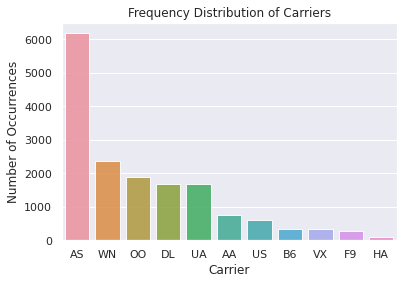

In [ ]:
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)

- **AS** has the **most** number of **occurrences**, followed by **WN**.

- **HA** is having the **least** number of **occurrences**.

<a id = Section2></a>
### **2. Replacing Values**

- The most **basic** encoding method is just **replacing** the **categories** with the **desired numbers**.

- This can be achieved with the help of the `replace()` function in pandas.

- The idea is that you have the **liberty** to **choose** whatever **numbers** you want to **assign** to the **categories** according to the business use case.

- **Creating** a **dictionary** which **contains mapping numbers** for **each category** in the carrier column:

In [ ]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

- **Note:** **Defining** a **mapping** via a **hard coded dictionary** is **easy** when the **number** of **categories** is **low**, like in this case which is 11.

- We can **achieve** the **same** mapping with the help of **dictionary comprehensions**.

  - This will be **useful** when the **categories count** is **high** and we **don't want to type** out each mapping.
  
- We will store the category names in a **list** called `labels` and then **zip** it to a **seqeunce of numbers** and **iterate** over it.

In [ ]:
labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


**Note:** Throughout the Encoding topic, we will be **making** a **copy** of the **dataset** via the **.copy()** method to practice each encoding technique to ensure that the **original DataFrame stays intact** and whatever changes we are doing **happen** only **in** the **copied** one.

In [ ]:
cat_df_flights_replace = cat_df_flights.copy()

- We will use the `replace()` function on the DataFrame by passing the **mapping dictionary** as **argument**.

In [ ]:
cat_df_flights_replace.replace(replace_map_comp, inplace=True)
print(cat_df_flights_replace.head())

   carrier tailnum origin dest
0       11  N455WN    PDX  SMF
1        4  N699DL    SEA  JNU
2        2  N442AS    SEA  LAS
3        1  N3CTAA    SEA  DFW
4        2  N754AS    SEA  SFO


- We have **encoded** the **categories** with the **mapped numbers** in our DataFrame.

- We can also check the **dtype** of the newly encoded column, which is now converted to **integers**.

In [ ]:
print(cat_df_flights_replace['carrier'].dtypes)

int64


<a id = Section3></a>
### **3. Label Encoding**

- Another approach is to **encode** categorical values with a technique called **"label encoding"**.

- It allows us to **convert each value** in a **column** to a **number**.

- Numerical **labels** are always **between 0** and **n_categories-1**.

#### **Using cat.codes**

In [ ]:
cat_df_flights_lc = cat_df_flights.copy()

- In Python, it's a **good practice** to **typecast categorical features** to a **category dtype** because they make the **operations** on such columns **much faster than** the **object dtype**.

- Also, the **size** of the **category dtype** columns is **much smaller** than the **object dtype** ones.

- We can do the **typecasting** by using `.astype()` method on your columns.

In [ ]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              
print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


- We can validate the **faster operation** of the **category dtype** by **timing** the **execution time** of the **same operation** done on a DataFrame with columns as category dtype and object dtype by using the time library.

- Let's say we want to **calculate** the **number of flights** for **each carrier** from each origin places, we can use the `.groupby()` and `.count()` methods on our DataFrame to do so.

In [ ]:
import time

In [ ]:
%timeit cat_df_flights.groupby(['origin','carrier']).count() #DataFrame with object dtype columns

100 loops, best of 3: 5.07 ms per loop


In [ ]:
cat_df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16205 entries, 0 to 16204
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16205 non-null  object
 1   tailnum  16205 non-null  object
 2   origin   16205 non-null  object
 3   dest     16205 non-null  object
dtypes: object(4)
memory usage: 506.5+ KB


- The **object** dtype column operation took **5.07 ms** per loop.

- Also, the **size** of the Dataframe is **506.6 KB**

In [ ]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

100 loops, best of 3: 4.58 ms per loop


In [ ]:
cat_df_flights_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16205 entries, 0 to 16204
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carrier  16205 non-null  category
 1   tailnum  16205 non-null  object  
 2   origin   16205 non-null  category
 3   dest     16205 non-null  object  
dtypes: category(2), object(2)
memory usage: 285.5+ KB


- The **category** dtype column operation took **4.58 ms** per loop.

- Also, the **size** of the Dataframe is **285.5 KB**

- The DataFrame with **category** dtype is much **faster**, and **smaller** in **size**.

- We can do **label encoding** via attributes `.cat.codes` on our DataFrame's column.

- This can only be **applied** on columns having **category** *dtype*.

In [ ]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes

In [ ]:
# Alphabetically labeled from 0 to 10
cat_df_flights_lc.head()

,carrier,tailnum,origin,dest
0,10,N455WN,PDX,SMF
1,3,N699DL,SEA,JNU
2,1,N442AS,SEA,LAS
3,0,N3CTAA,SEA,DFW
4,1,N754AS,SEA,SFO


In [ ]:
cat_df_flights_lc['carrier'].value_counts()

1     6181
10    2362
6     1891
3     1695
7     1666
0      758
8      601
2      336
9      331
4      275
5      109
Name: carrier, dtype: int64

- The **labels** are **alphabetically labeled** from **0 to 10**.

#### **Using np.where**

- Sometimes, we might just want to **encode** a **bunch** of **categories** within a feature **to some numeric value** and **encode** all the **other categories** to some **other numeric value**.

- We can do this by using numpy's **where()** function.

- We will encode all the **US carrier flights** to value **1** and **other carriers** to value **0**.

  - This will **create** a **new column** in your DataFrame with the encodings.
  
  - Later, if we want to **drop** the **original column**, you can do so by using the **drop()** function in pandas.

In [ ]:
cat_df_flights_specific = cat_df_flights.copy()

- If the **carrier** value **contains US**, **replace** it **with 1**.

- **Otherwise**, **replace** the carrier value **with 0**.

- And, **save** the **outputs** in `US_code` columns in the Dataframe.

In [ ]:
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)
cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,WN,N455WN,PDX,SMF,0
1,DL,N699DL,SEA,JNU,0
2,AS,N442AS,SEA,LAS,0
3,AA,N3CTAA,SEA,DFW,0
4,AS,N754AS,SEA,SFO,0


In [ ]:
cat_df_flights_specific['US_code'].value_counts()

0    15604
1      601
Name: US_code, dtype: int64

- The column contains **two** labels **0** and **1**.

#### **Using LabelEncoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_df_flights_sklearn = cat_df_flights.copy()

In [ ]:
lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df_flights['carrier'])

In [ ]:
# Results in a new column in the df
cat_df_flights_sklearn.head()

,carrier,tailnum,origin,dest,carrier_code
0,WN,N455WN,PDX,SMF,10
1,DL,N699DL,SEA,JNU,3
2,AS,N442AS,SEA,LAS,1
3,AA,N3CTAA,SEA,DFW,0
4,AS,N754AS,SEA,SFO,1


In [ ]:
cat_df_flights_sklearn['carrier_code'].value_counts()

1     6181
10    2362
6     1891
3     1695
7     1666
0      758
8      601
2      336
9      331
4      275
5      109
Name: carrier_code, dtype: int64

- The categories are labeled from **0 to 10**.

- **Label encoding** is pretty much **intuitive** and **straight-forward** and may give you a **good performance** from your learning algorithm.

- But it has as **disadvantage** that the **numerical values** can be **misinterpreted** by the algorithm.

  - **Should** the carrier **US** (encoded to **8**) be given **8x more weight than** the carrier **AS** (encoded to **1**) ?

<a id = Section4></a>
### **4. One-Hot Encoding**

- The basic strategy is to **convert each category value** into a **new column** and **assign a 1 or 0** (True/False) **value** to the column.

- This has the **benefit** of **not weighting** a **value improperly**.

#### **Using pd.get_dummies()**

- There are many libraries out there that support one-hot encoding but the **simplest** one is using pandas' `.get_dummies()` method.

- This function is **named** this way because it **creates dummy/indicator variables** (**1 or 0**).

- There are **mainly three arguments** important here:
  
  - The **first** one is the **DataFrame** you want to encode on.
  
  - **Second** being the **columns** argument which lets you **specify** the **columns** you want to do **encoding** on.
  
  - And third, the **prefix** argument which lets you **specify** the **prefix** for the **new columns** that will be created after encoding.

In [ ]:
cat_df_flights_onehot = cat_df_flights.copy()

In [ ]:
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix=['carrier'])
cat_df_flights_onehot.head()

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
0,N455WN,PDX,SMF,0,0,0,0,0,0,0,0,0,0,1
1,N699DL,SEA,JNU,0,0,0,1,0,0,0,0,0,0,0
2,N442AS,SEA,LAS,0,1,0,0,0,0,0,0,0,0,0
3,N3CTAA,SEA,DFW,1,0,0,0,0,0,0,0,0,0,0
4,N754AS,SEA,SFO,0,1,0,0,0,0,0,0,0,0,0


- As you can see, the column `carrier_AS` gets value **1** at the **0th** and **4th** observation points as those points had the **AS category** labeled in the **original DataFrame**.

- Likewise for other columns also.

**Using LabelBinarizer or OneHotEncoder**

- Scikit-learn also supports **one hot encoding** via `LabelBinarizer` and `OneHotEncoder` in its **preprocessing** module.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

- **Creating** `LabelBinarizer` object and **transforming** the `carrier` column.

In [ ]:
lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])

In [ ]:
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0


- Note that this **lb_results_df** resulted in a new DataFrame with only the one hot encodings for the feature carrier.

- This needs to be **concatenated** back with the original DataFrame, which can be done via pandas' `.concat()` method.

  - The **axis** argument is set to **1** as you want to **merge** on **columns**.

- **Concatenating** the **one-hot encoded values** with the **original** dataframe.

In [ ]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)
result_df.head()

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
0,WN,N455WN,PDX,SMF,0,0,0,0,0,0,0,0,0,0,1
1,DL,N699DL,SEA,JNU,0,0,0,1,0,0,0,0,0,0,0
2,AS,N442AS,SEA,LAS,0,1,0,0,0,0,0,0,0,0,0
3,AA,N3CTAA,SEA,DFW,1,0,0,0,0,0,0,0,0,0,0
4,AS,N754AS,SEA,SFO,0,1,0,0,0,0,0,0,0,0,0


- While one-hot encoding **solves** the **problem of unequal weights** given to **categories** within a feature.

- It is **not very useful** when there are **many categories**, as that will result in **formation** of as **many new columns**, which can result in the **curse of dimensionality**.

<a id = Section5></a>
### **5. Binary Encoding**

- In this technique, **first** the **categories** are **encoded** as **ordinal**, then those **integers** are **converted** into **binary** code, then the **digits** from that **binary** string are **split** into separate columns.

- This **encodes** the data in **fewer dimensions** than one-hot.

- You can do binary encoding via a number of ways but the **simplest** one is using the **category_encoders** library.

**Installing category_encoders library**

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


**Note:** You might need to restart the kernel after installing the library in order to use it.

In [ ]:
import category_encoders as ce

In [ ]:
cat_df_flights_ce = cat_df_flights.copy()

- Using `BinaryEncoder` of **category_encoders** library to perform **binary encoding** on the `carrier` column.

In [ ]:
encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

In [ ]:
df_binary.head()

,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,tailnum,origin,dest
0,0,0,0,0,1,N455WN,PDX,SMF
1,0,0,0,1,0,N699DL,SEA,JNU
2,0,0,0,1,1,N442AS,SEA,LAS
3,0,0,1,0,0,N3CTAA,SEA,DFW
4,0,0,0,1,1,N754AS,SEA,SFO


- The **four new columns** are **created in place of** the `carrier` column with **binary encoding** for **each category** in the feature.

<a id = Section6></a>
### **6. Backward Difference Encoding**

- This technique falls under the **contrast coding system** for categorical features.

- A **feature** of **K categories**, or levels, usually **enters** a **regression** as a **sequence** of **K-1 dummy variables**.

- In backward difference coding, the **mean** of the **dependent variable** for a **level** is **compared** with the **mean** of the **dependent variable** for the **prior level**.

- This type of coding may be **useful** for a **nominal** or an **ordinal** variable.

**Installing category_encoders library**

In [ ]:
# !pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
cat_df_flights_ce = cat_df_flights.copy()

- Using `BackwardDifferenceEncoder` of **category_encoders** library to perform **backward difference encoding** on the `carrier` column.

In [ ]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

In [ ]:
df_bd.head()

,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
0,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N455WN,PDX,SMF
1,1,0.090909,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N699DL,SEA,JNU
2,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N442AS,SEA,LAS
3,1,0.090909,0.181818,0.272727,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N3CTAA,SEA,DFW
4,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N754AS,SEA,SFO


- The **interesting** thing here is that you can see that the **results** are **not** the **standard 1’s and 0’s** you saw in the dummy encoding examples but rather **regressed continuous values**.

<a id = Section7></a>
### **7. Miscellaneous Features**

- Sometimes you may encounter **categorical feature** columns which **specify** the **ranges of values** for observation points.

  - For example, the **age** column might be described in the form of **categories** like **0-20**, **20-40** and so on.

- While there can be a lot of ways to **deal** with such features, the **most common** ones are either:
  
  - **Split** these **ranges** into **two separate columns** or
  
  - **Replace** them with some **measure** like the **mean** of that **range**.

- We will first create a **dummy DataFrame** which has just one feature **age** with **ranges** specified using the pandas DataFrame function.

- Then we will **split** the column on the **delimeter -** into **two columns** `start` and `end` using `split()` with a `lambda()` function.

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age.head()

,age
0,0-20
1,20-40
2,40-60
3,60-80


In [ ]:
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))
dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


- The `age` column is **splitted** into** two separate columns** `start` and `end`, containing the **respective age range values**.

- To **replace** the **range** with its **mean**, we will write a `split_mean()` function which basically **takes** one **range** at a time, **splits it**, then **calculates** the **mean** and **returns it**.

- To **apply** a certain **function** to **all** the **entities** of a column we will use the `.apply()` method.

In [ ]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age.head()

,age
0,0-20
1,20-40
2,40-60
3,60-80


- **Defining** the `split_mean` function. 

In [ ]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

- Using the `split_mean` function to **calculate** the **mean** of the **age range** and save it in `age_mean` column.

In [ ]:
dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))
dummy_df_age.head()

,age,age_mean
0,0-20,10.0
1,20-40,30.0
2,40-60,50.0
3,60-80,70.0


- The `age_mean` column contains the **mean** of the **respective age range values**.